In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'D:/CIFAR-10-images-master/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_array, class_num])
print(len(TRAIN_DATA))

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:17<00:00, 64.59it/s]

50000


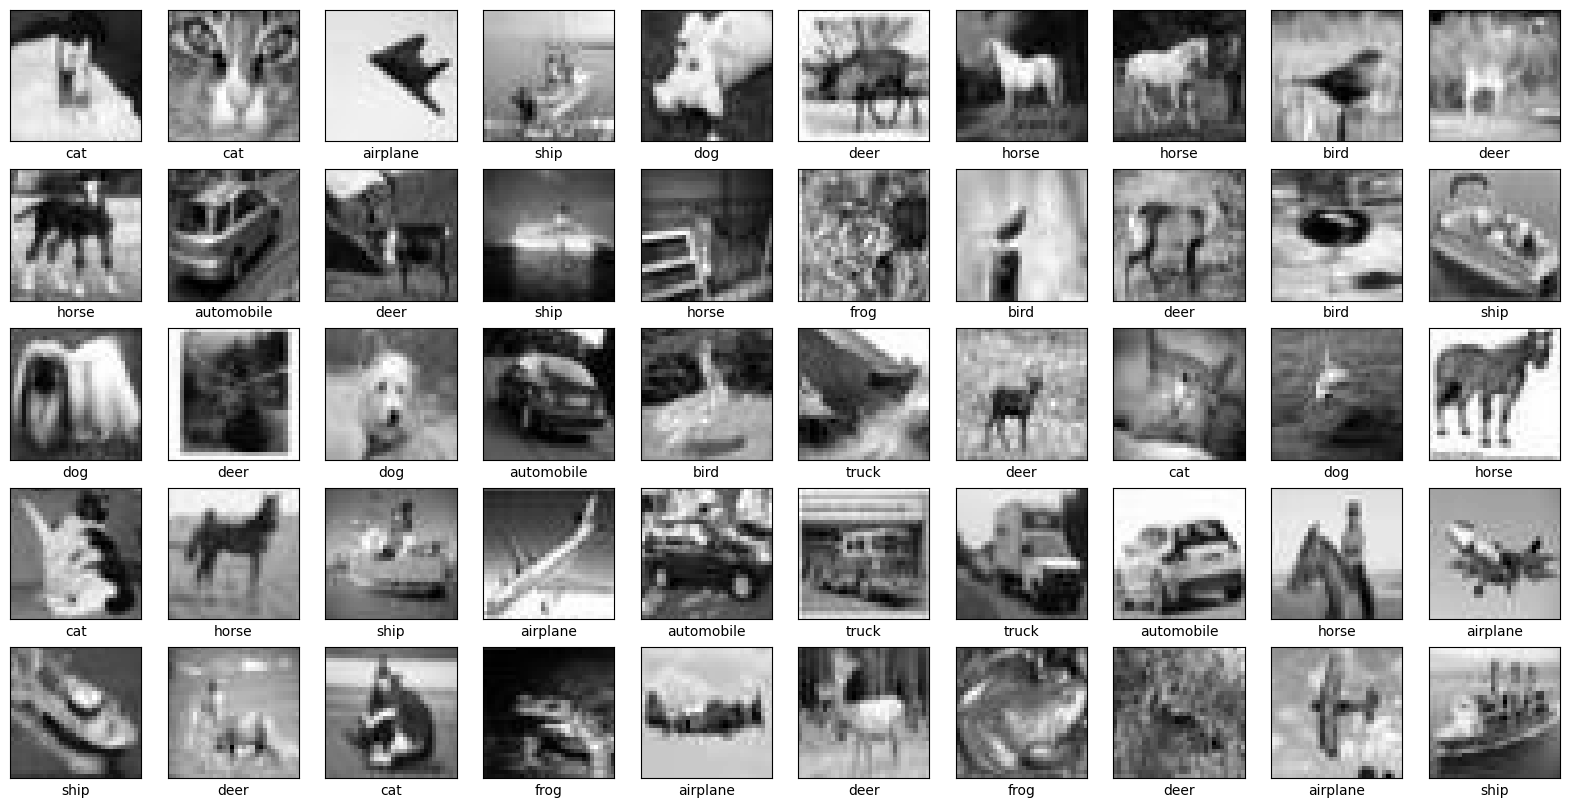

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    image =TRAIN_DATA[i][0]
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    plt.imshow(gray_image, cmap="gray")
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [5]:
S0 = TRAIN_DATA[0:1000]
S1 = TRAIN_DATA[1000:2000]
S2 = TRAIN_DATA[2000:3000]
S3 = TRAIN_DATA[3000:4000]
S4 = TRAIN_DATA[4000:5000]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

k_max = 20

class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, A, B):
        self.A_train = A
        self.B_train = B
    def predict(self, A, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(A)
        else:
            raise ValueError('Invalid value %d ' % num_loops)
        return self.predict_labels(dists, k=k)


    def compute_distances(self, A):
        num_test = A.shape[0]
        num_train = self.A_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        dists = np.sqrt(np.sum(np.square(self.A_train), axis=1) + np.sum(np.square(A), axis=1)[:, np.newaxis] - 2 * np.dot(A, self.A_train.T))
        pass
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        B_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_B = []
            sorted_dist = np.argsort(dists[i])
            closest_B = list(self.y_train[sorted_dist[0:k]])
            pass
            B_pred[i]= (np.argmax(np.bincount(closest_B)))
            pass
        return B_pred

def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def knn(train, validation, k):
    preds = []
    for v in validation:
        distances = []
        for t in train:
            l2 = l2_dist(v[0], t[0])
            distances.append((l2, t[1]))
        distances.sort(key=lambda x: x[0])
        neighbors = [d[1] for d in distances[:k]]
        counts = np.bincount(neighbors)
        pred = np.argmax(counts)
        preds.append(pred)
    return preds

mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

for k in tqdm(range(1, k_max+1)):
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    for i in range(5):
        if i == 0:
            train = S1+S2+S3+S4
            validation = S0
        elif i == 1:
            train = S0+S2+S3+S4
            validation = S1
        elif i == 2:
            train = S1+S0+S3+S4
            validation = S2
        elif i == 3:
            train = S1+S2+S0+S4
            validation = S3
        elif i == 4:
            train = S1+S2+S3+S0
            validation = S4

        acc_l1 = 0
        acc_l2 = 0

        for v in validation:
            l1_dists = []
            l2_dists = []
        for t in train:
            l1 = l1_dist(v[0], t[0])
            l2 = l2_dist(v[0], t[0])
            l1_dists.append((l1, t[1]))
            l2_dists.append((l2, t[1]))
        l1_dists.sort(key=lambda x: x[0])
        l2_dists.sort(key=lambda x: x[0])

        neighbors_l1 = [d[1] for d in l1_dists[:k]]
        counts_l1 = np.bincount(neighbors_l1)
        pred_l1 = np.argmax(counts_l1)

        neighbors_l2 = [d[1] for d in l2_dists[:k]]
        counts_l2 = np.bincount(neighbors_l2)
        pred_l2 = np.argmax(counts_l2)
        if pred_l1 == v[1]:
            acc_l1 += 1
        if pred_l2 == v[1]:
            acc_l2 += 1

        fold_accuracies_l1.append(acc_l1 / len(validation))
        fold_accuracies_l2.append(acc_l2 / len(validation))

    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.06s/it]


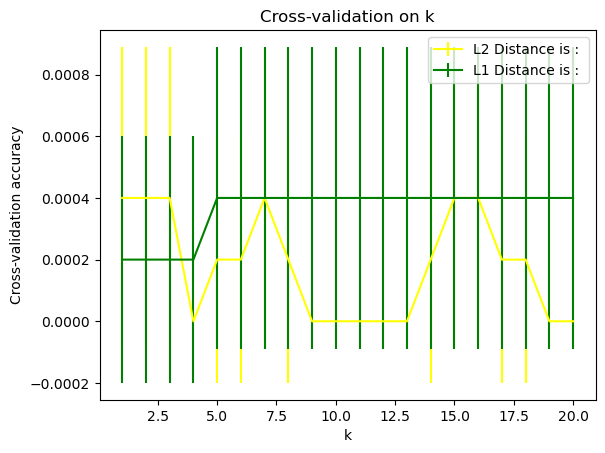

In [10]:
plt.errorbar(range(1, k_max+1), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance is : ",color="yellow")
plt.errorbar(range(1, k_max+1), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance is : ",color="green")
plt.xlabel("k")
plt.ylabel("Cross-validation accuracy")
plt.title("Cross-validation on k")
plt.legend()
plt.show()

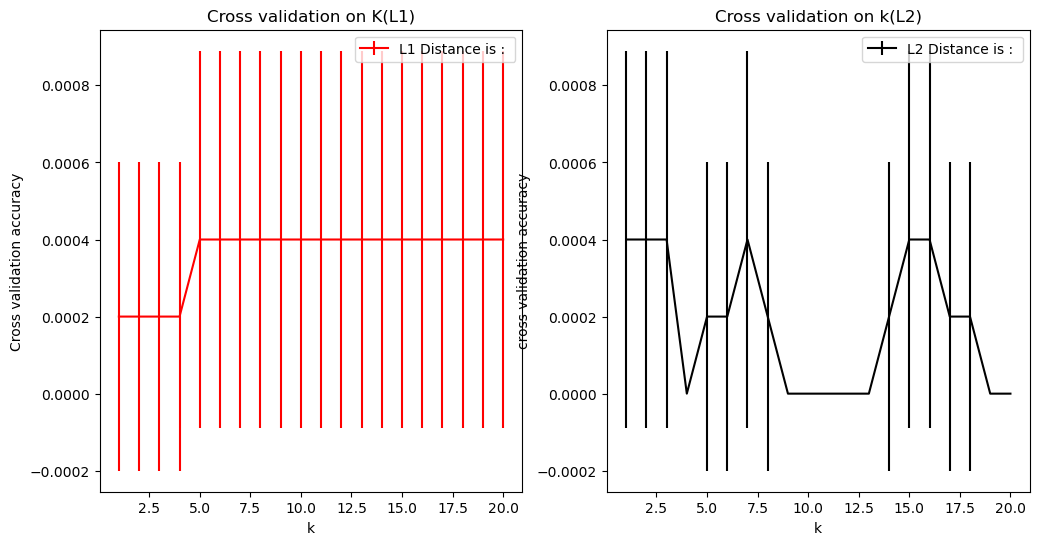

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.errorbar(range(1, k_max+1), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance is : ", color="red")
ax1.set_xlabel("k")
ax1.set_ylabel("Cross validation accuracy")
ax1.set_title("Cross validation on K(L1)")
ax1.legend()

ax2.errorbar(range(1, k_max+1), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance is : ", color="black")
ax2.set_xlabel("k")
ax2.set_ylabel("cross validation accuracy")
ax2.set_title("Cross validation on k(L2)")
ax2.legend()

plt.show()

In [13]:
print("The code provides a complete implementation of the KNN algorithm using L1 and L2 distance metrics and performs cross-validation to evaluate its performance for different values of k.")
print("Improving accuracy is possible.")

The code provides a complete implementation of the KNN algorithm using L1 and L2 distance metrics and performs cross-validation to evaluate its performance for different values of k.
Improving accuracy is possible.
